<h1>Importando CSV</h1>

In [12]:
import pandas as pd
import numpy as np

df_codingdata = pd.read_csv("../../Outputs/codingdata_vidyo4_22.csv",sep="\t", names=["baseqp","cost","cunumberpel","currbtdepth","currdepth","currmtdepth","currqtdepth","currtrdepth","diagavg",
      "diagsad","diavar","diffminmax","distortion","fracbits","height","max","min","modetype","poc","qp",
      "pelavg","pelcornersavg","peldiffdiagonal","peldifffullcorneravg","squaredcu","videoresheight","videoreswidth",
      "treetype","width","x","y","prevpocheight","prevpocwidth","thisheightminusprevheight","thiswidthminusprevwidth",
      "thissizeminusprevsize"])

df_codingdata = df_codingdata.query("cost > 0 and poc > 0 and width >= 32 and height >= 32 and width == height")

df_desfecho = pd.read_csv("../../Outputs/encodeddata_vidyo4_22.csv",sep="\t", index_col=0 ,names=["poc","depth","x","y","w","h"])

pocs = np.unique(df_desfecho['poc'])

df_desfecho_collection = {}

for ppoc in pocs:
      df_desfecho_collection[ppoc] = df_desfecho.query("@ppoc == poc")

# df_codingdata = df_codingdata.query("x < 128 and y < 128 and poc == 0")
# df_desfecho = df_desfecho.query("x < 128 and y < 128 and poc == 0")

def setTarget(line) :
    
    xI = line['x']   
    yI = line['y']
    h = line['height']
    w = line['width']
    poc = line['poc']
    
    xF = xI+w-1
    yF = yI+h-1

    filtered_target = df_desfecho_collection[poc].query('x < @xF and y < @yF and x >= @xI and y >= @yI')
    
   

    if(len(filtered_target) <= 1):
        return 0 #Dont split
    else :
        return 1 #Split
    
targets = df_codingdata.apply(setTarget , axis=1)

df_codingdata['target'] = targets

In [ ]:
print(len(df_codingdata[df_codingdata['target']==0]))
print(len(df_codingdata[df_codingdata['target']==1]))

In [19]:
dados = df_codingdata.query('poc > 0 and cost > 0').filter(['cost',"cunumberpel","currbtdepth","currdepth","currmtdepth","currqtdepth","currtrdepth","diagavg",
      "diagsad","diavar","diffminmax","distortion","fracbits","height","max","min","modetype","qp",
      "pelavg","pelcornersavg","peldiffdiagonal","peldifffullcorneravg","squaredcu","videoresheight","videoreswidth",
      "treetype","width","prevpocheight","prevpocwidth","thisheightminusprevheight","thiswidthminusprevwidth",
      "thissizeminusprevsize",'target'])



In [20]:
from sklearn.model_selection import train_test_split

treino, teste = train_test_split(dados, test_size=0.2)
print("Tamanos dos conjuntos (treino, teste):", len(treino), len(teste))

Tamanos dos conjuntos (treino, teste): 29117 7280


In [30]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=4)
X_treino = dados.drop('target', axis='columns')
y_treino = dados['target']

model = clf.fit(X_treino, y_treino)

In [31]:
from sklearn.metrics import accuracy_score

X_teste = dados.drop('target', axis='columns')
y_teste = dados['target']

predicoes = model.predict(X_teste)

acc = accuracy_score(y_teste, predicoes)
print(acc)

0.9596944803143116


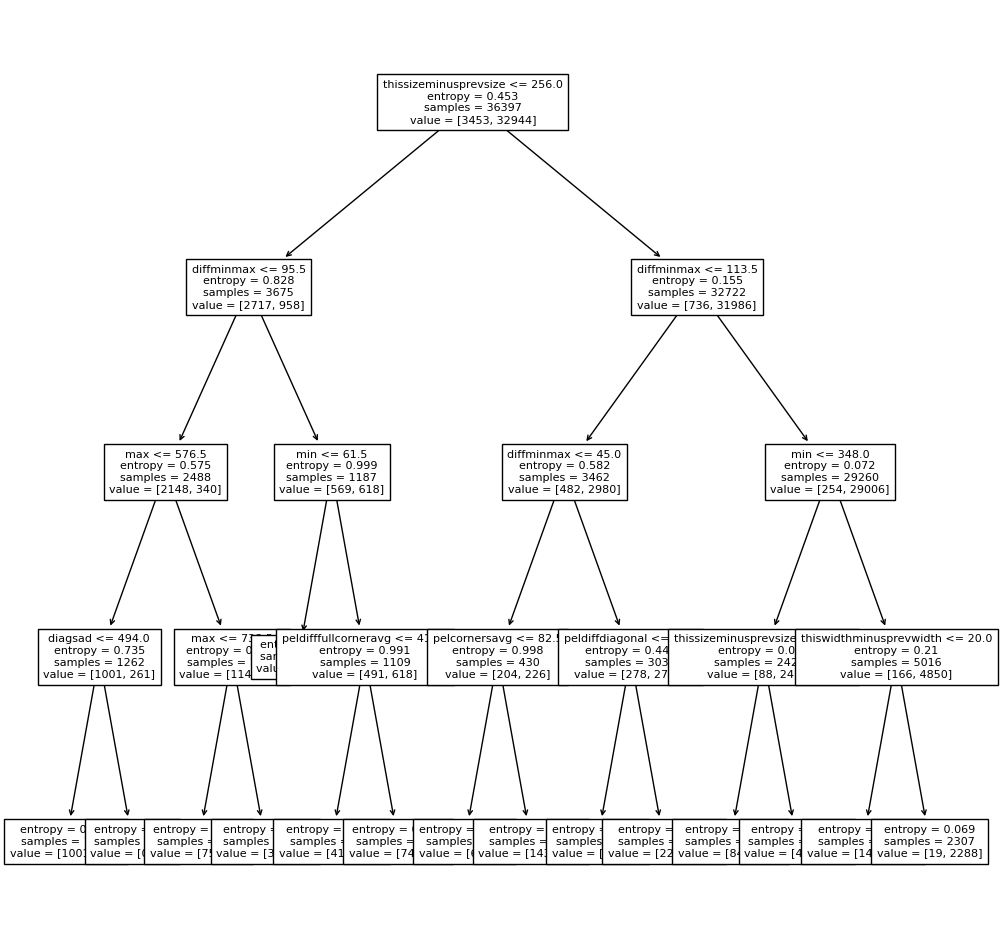

In [32]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(model, fontsize=8, feature_names=['cost',"cunumberpel","currbtdepth","currdepth","currmtdepth","currqtdepth","currtrdepth","diagavg",
      "diagsad","diavar","diffminmax","distortion","fracbits","height","max","min","modetype","qp",
      "pelavg","pelcornersavg","peldiffdiagonal","peldifffullcorneravg","squaredcu","videoresheight","videoreswidth",
      "treetype","width","prevpocheight","prevpocwidth","thisheightminusprevheight","thiswidthminusprevwidth",
      "thissizeminusprevsize",'target'])
plt.show()

#tree.plot_tree(model)